In [1]:
import paddle.fluid as fluid 
fluid.install_check.run_check()
!unzip -oq /home/aistudio/data/data269/房价预测.zip

Running Verify Fluid Program ... 
Your Paddle Fluid works well on SINGLE GPU or CPU.
Your Paddle Fluid works well on MUTIPLE GPU or CPU.
Your Paddle Fluid is installed successfully! Let's start deep Learning with Paddle Fluid now


In [2]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data269


In [3]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [4]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 122kB 15.1MB/s eta 0:00:01


In [5]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

# **深度学习基础知识回顾**


### *1. 深度学习发展史*
> 参考书目：DEEP LEARNING  
> 参考链接：https://zhuanlan.zhihu.com/p/29096536  

**在DEEP LEARNING一书当中所提到：人工智能的真正挑战在于解决那些对人来说很容易执行、但很难形式化描述的任务。而同时也给出的深度学习定义：“层次化的概念让计算机构建较简单的概念来学习复杂概念。如果绘制出表示这些概念如何建立在彼此之上的一幅图，我们将得到一张‘深’层次的图。由此，我们称这种方法为AI深度学习。”**  
  
我们普遍认为，深度学习的雏形出现在在控制论的**萌芽期**，到目前为止深度学习已经经历了三次发展浪潮：①1950-1968年期间由于感知器模型的提出而引起**第一次高潮期**，但因其被指出存在梯度消失问题而陷入了低谷，进入了**反思期**。②20世纪80年代到90年代，前后有J.Hopfield于1982年提出了循环神经网络，Rumelhart等研究者提出了多层网络的学习算法—**BP算法**，进入了**第二次的高潮期**。③2006年Hinton等人提出了深度置信网络，而在2012年的ImageNet比赛中深度学习强大的能力刷新了大众的认识，而2016年AIphaGo的胜利更让全世界更加密切的关注这个强大算法，从此深度学习的发展正式进入了**爆发时期**。  
![](https://ai-studio-static-online.cdn.bcebos.com/26af0f12414e4a328a35ec987b4629ae486757704b01478ea4fa5dd5a6113b1f)


















###  *2.人工智能、机器学习、深度学习的区别和联系*  
> https://www.cnblogs.com/wangsongbai/p/9116154.html  
> https://zhuanlan.zhihu.com/p/66706070  

用一个同心圆的方式来展现三者之间的关系最为恰当不过，如下图所示，人工智能的涵盖范围最广，机器学习次之，深度学习出现的最晚，但却是当今时代人工智能大爆炸的核心驱动力。  
![](https://ai-studio-static-online.cdn.bcebos.com/60cce873129549b082a7777fb057838aa53f56c8903543599ee5e55764a64402)  

1956年，几个计算机科学家相聚在达特茅斯会议（Dartmouth Conferences），提出了“人工智能”的概念。其后，人工智能就一直萦绕于人们的脑海之中，并在科研实验室中慢慢孵化。之后的几十年，人工智能一直在两极反转，或被称作人类文明耀眼未来的预言；或者被当成技术疯子的狂想扔到垃圾堆里。坦白说，直到2012年之前，这两种声音还在同时存在。  
过去几年，尤其是2015年以来，人工智能开始大爆发。很大一部分是由于GPU的广泛应用，使得并行计算变得更快、更便宜、更有效。当然，无限拓展的存储能力和骤然爆发的数据洪流（大数据）的组合拳，也使得图像数据、文本数据、交易数据、映射数据全面海量爆发。

什么是人工智能？简单来说就是**给机器赋予上人的智能**。人工智能在概念意义上又分为**强人工智能**和**弱人工智能**两种，前者就是一般意义上的机器能够和人一样完成独立的学习思考，能够完成一切人类所能完成的任务，包括感知、学习、感觉、想象等等，后者的“弱“字体现在它仅能完成一部分人所能完成的所特定的功能，比如当下的人脸识别、语音识别等等任务。  

那么我们如何去实现我们的人工智能呢？这其中的核心方法就是**机器学习**，机器学习就是一系列能够让机器实现智能的方法的汇总，这其中就包括了决策树、支持向量机、神经网络、概率图等等一系列方法。机器学习最基本的做法，是使用算法来解析数据、从中学习，然后对真实世界中的事件做出决策和预测。  

随着这些年在硬件方面的提升和海量数据的增长，机器学习当中一个分支开始有了爆炸式的增长---人工神经网络。而在人工神经网络领域最重要的方法就是**深度学习**。人工神经网络就是通过模仿人的神经元的结构将属于进行加权输入，通过非线性化的拟合，来达到以任意精度逼近函数的目的，而这其中的“深度”二字就是体现在了我们的神经网络的层数是多层的，这个概念很早之前就被提出来了，但是局限于算力和数据的缺失，在以往并没有取得很好的效果，但是随着硬件条件的提升和数据的爆炸，我们正处在一个“粮草充足、兵马肥壮”的时代，正需要我们通过深度学习的方式，为我们的智能时代打下一片新的江山。
























### *3. 神经元、单层感知机、多层感知机*  
> 西电 吴金建老师ppt  

人工神经网络领域的神经元概念来源于生物神经元的启发
生物神经元的组成有三大部分：细胞体、轴突、树突，三个部分分别大致完成不同的功能。树突主要通过表面的受体接受来自外端的信号传输，细胞体主要完成对输入信号的处理，然后轴突通过电信号的方式传输到下一个神经元的树突部分，通过协调协作，每一个神经元都能够独立的完成一定的工作。  

![](https://ai-studio-static-online.cdn.bcebos.com/e41b56b5a098402ba035c84c03e3c80d53700c3ca6984b6bb85179a774801159)  

收到生物神经元的启发，人工神经网络的神经元也具备有类似的结构来完成这种操作。如上图MP神经元模型。  
通过对输入信号的加权求和，再通过非线性化的激活函数，我们就可以以任意精度的逼近任何函数。我们常用的激活函数就有Relu、sigmoid等等。  

通过将神经元的组合起来，每一个神经元作为一个节点我们就可以用来搭建完成一个单层的感知机（也可以称为单层神经网络），模型图示如下所示。  
![](https://ai-studio-static-online.cdn.bcebos.com/fc25288d848048bc89c3bb6bfc5f3944ec3bc5657a3a47879a76b2f104f07bbe)  

而我们通过将每一层作为一个单元，我们可以给网络模型不断地增加它的层数，用来增加模型的复杂程度，则可以使得模型的精度会更高而且能够处理的问题也变得更加全面，但同时我们模型训练的时间也会更加的漫长。  
![](https://ai-studio-static-online.cdn.bcebos.com/fd227640cee34ddd99da2a35bd4816e99493ff9d4b1642fc80956f243d7394dc)













### *4.前向传播*    
> https://blog.csdn.net/bitcarmanlee/article/details/78819025  

前向传播的思想较为简单，简单来说就是给定一组特定的输入和网络模型，输入通过网络模型一层一层的计算相应的输出值，随着计算的更替，计算也在一层一层的推进，这就是前向传播的过程。  
![](https://ai-studio-static-online.cdn.bcebos.com/7ea76b0c48a346b3845df5b12f36d4fe18f230109a5f451c9d53db37b0baac18)  
例如上图所示。对于给定的X=(x1,x2,x3,...xn)
我们可以计算得出他们的加权输入，然后通过我们的非线性的激活函数f进行非线性化处理，最后得到了单层的输出yi，然后我们计算出所有这一层的输出之后，加上一个偏置项b，将这些所有的结果(b,y1,y2,y3,....,yk)作为下一层的输入项，继续进行相应的计算，这就是前向传播的过程。





















### *5.反向传播*  
> https://blog.csdn.net/bitcarmanlee/article/details/78819025  
> https://blog.csdn.net/ft_sunshine/article/details/90221691  

解决完前向传播的过程之后，我们可以计算出单轮的网络输出结果了，但是我们还更希望网络能够在不断的计算中自己来更新得到一组参数W，使得这组参数能对特定的输出X，得到与我们期望的目标输出t的最好估计结果y，那么这个能够让网络自动更新参数的算法就是我们的反向传播算法。这个算法也曾引起了第二次的人工智能浪潮，它的核心思想就是我们最基础的数学领域的**链式法则**。   

反向传播算法其实也就是我们的误差的反向传播算法，我们重用的误差算法也就是我们的评价准则。比如说均法误差损失。  
首先，是我们的第一步，**误差的计算**。以下示例当中我们所采用的是直接作差的误差方式。  
![](https://ai-studio-static-online.cdn.bcebos.com/f534dd77d8c14e3ea663f2de06df8f5499883c23031c42ceb72486c42484c99c)    
![](https://ai-studio-static-online.cdn.bcebos.com/41a87805790e4c59863a67c4c283a043b989434e437841b780e44af135657686)     
![](https://ai-studio-static-online.cdn.bcebos.com/dae2caaccd4242dba178076356d035ad5d4a1d8eadb6460cafea17baf87aca2d)    
然后，就是我们的第二步，**计算相应的梯度值**。  
![](https://ai-studio-static-online.cdn.bcebos.com/47e4e3ee12704fd4bc17e991cf38c97296afabdb35fc47ecb4ef94f93b62ccf3)  
![](https://ai-studio-static-online.cdn.bcebos.com/fa33860d38334363889746535f658fe3fb73ac48545640769f7b70cfc1a3e81e)  
![](https://ai-studio-static-online.cdn.bcebos.com/308682ad3ac04bc0bce30bdecd592e2bfc97b445834f475bad890d3fe6addc93)  
![](https://ai-studio-static-online.cdn.bcebos.com/1f9828374e34437da4a17426225f0624767a383fc3de427fae56c085aa80f76b)  
至此，我们所有的梯度计算就完毕了，我们可以发现，对于多输出的问题，它们对对应节点所作出的调整取决于权重，与对应节点的权重大则给定输出对对应节点的输出的影响是大的，最后节点的调整是对于多个输出所对应做出调整的加权和，这是符合一般规律的。















# **房价预测的python+numpy实现**

### *1. 解压数据集，并且查看打印数据集内容*    

房价数据集只有两个标签，分别是房屋的面积和房价，为了便于处理，我们对数据进行**归一化**处理操作。
归一化的方式有多种，此次我们采用max-min归一化操作。

基本上所有的数据在拿到后都必须进行归一化，至少有以下3条原因：

1.过大或过小的数值范围会导致计算时的浮点上溢或下溢。

2.不同的数值范围会导致不同属性对模型的重要性不同（至少在训练的初始阶段如此），而这个隐含的假设常常是不合理的。这会对优化的过程造成困难，使训练时间大大加长。

3.很多的机器学习技巧/模型（例如L1，L2正则项，向量空间模型-Vector Space Model）都基于这样的假设：所有的属性取值都差不多是以0为均值且取值范围相近的。

**数据集分割**

将原始数据处理为可用数据后，为了评估模型的好坏，我们将数据分成两份：训练集和测试集。

训练集数据用于调整模型的参数，即进行模型的训练，模型在这份数据集上的误差被称为训练误差；
测试集数据被用来测试，模型在这份数据集上的误差被称为测试误差。
我们训练模型的目的是为了通过从训练数据中找到规律来预测未知的新数据，所以测试误差是更能反映模型表现的指标。分割数据的比例要考虑到两个因素：更多的训练数据会降低参数估计的方差，从而得到更可信的模型；而更多的测试数据会降低测试误差的方差，从而得到更可信的测试误差。我们这个例子中设置的分割比例为8:2。

In [6]:
import numpy as np
import pandas as pd
data_path='./房价预测/data/data.txt'
colnames = ['房屋面积']+['房价']
print_data = pd.read_csv(data_path, names = colnames)
data=np.loadtxt(data_path,delimiter = ',')
print_data.head()

房屋面积     房价
0   98.87  599.0
1   68.74  450.0
2   89.24  440.0
3  129.19  780.0
4   61.64  450.0

In [7]:
#axis=0,表示按列计算
#data.shape[0]表示data中一共有多少列
maximums, minimums, avgs = data.max(axis=0), data.min(axis=0), data.sum(axis=0)/data.shape[0]
print("the raw area :",data[:,0].max(axis = 0))
print("按列最大值，最小值，平均值：",maximums,minimums,avgs)
data=(data-avgs)/(maximums-minimums)
print('normalizatin:',data.max(axis=0))

the raw area : 199.96
按列最大值，最小值，平均值： [ 199.96 2000.  ] [ 40.09 202.  ] [ 94.64454023 608.25057471]
normalizatin: [0.65875686 0.77405419]


In [8]:
### 数据集的分割，ratio为分割比例
ratio = 0.8
offset = int(data.shape[0]*ratio)
train_data = data[:offset].copy()
test_data = data[offset:].copy()
print(len(data))
print(len(train_data))

870
696


In [9]:
#对上述函数进行封装
def data_load(data_path,ratio=0.8):
    data=np.loadtxt(data_path,delimiter = ',',dtype='float32')
    maximums, minimums, avgs = data.max(axis=0), data.min(axis=0), data.sum(axis=0)/data.shape[0]
    #归一化
    data=(data-avgs)/(maximums-minimums)
    #数据集分割
    ratio = 0.8
    offset = int(data.shape[0]*ratio)
    train_data = data[:offset].copy()
    test_data = data[offset:].copy()
    train_feature,train_label=train_data[:,:-1],train_data[:,-1]
    test_feature,test_label=test_data[:,:-1],test_data[:,-1]
    return train_feature,train_label,test_feature,test_label

### *2.模型设计*
假设房价和各影响因素之间能够用线性关系来描述：  
![](https://ai-studio-static-online.cdn.bcebos.com/b251694299114e6b9e235d7b38b0d7623e892cbb04d046d38b9bb86b58aaba3c)  
我们可以直接给定一组初始化的系数W，然后进行模型的拟合。
损失函数我们采用MSE损失函数，方程式如下所示。为了计算方便，我们更改系数为1/2n  
![](https://ai-studio-static-online.cdn.bcebos.com/045446fbb30647f1a71a43b9497474eb245a6e980d2a4ed79e3a2696e2335568)  

本次实验所采用的线性模型的结构如下所示。由于numpy实现两层的过于复杂，时间关系，仅通过一层来实现作为说明  
![](https://ai-studio-static-online.cdn.bcebos.com/de5ee7d6737941009c2e1a4092496783f25f1953a8c34a588625899993fe9bbb)









In [10]:
# 自定义网络框架
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，
        # 此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
    # 前向计算过程    
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    # MSE函数实现
    def loss(self, z, y):
            error = z - y
            cost = error * error
            cost = np.mean(cost)
            return cost
x,y,_,_=data_load(data_path)

net=Network(1)
z=net.forward(x[:5])
loss=net.loss(z,y[:5])
print(f' predict：{z[:,0]}\n',
f"Ture label:{y[:5]}\n",
"loss:",loss)

 predict：[ 0.04662517 -0.2858381  -0.05963511  0.38118489 -0.36418156]
 Ture label:[-0.00514491 -0.08801477 -0.0935765   0.0955225  -0.08801477]
 loss: 0.0757117481668684


### *3.训练过程*    
> 飞浆官网 https://www.paddlepaddle.org.cn/tutorials/projectdetail/1516091#anchor-8  

通过以上的讨论，我们采用梯度下降法来对我们的算法参数进行优化求解.
![](https://ai-studio-static-online.cdn.bcebos.com/5d598e29550f4edb89e7a2dbfc9b60d68e4cdfc9b12b478faaa4863f4e0f0598)  

对上图我们还可以进行一系列的优化，例如我们可以在X所有项加上一个指定参数1，使之变成X=[1,x1,x2,x3,...xn]T,那么我们对应的可以更改W为[b,w1,w2,w,3,...,wn]T,那么我们的自变量和参数都可以变为nx1的变量。所以线性方程变为y=W_T*X，其中W_T是W的转置，X是表示输入样本。那么我们对于W的修改就可以通过矩阵操作统一实现。



In [11]:
# 对x进行修正
def modify_x(x):
    x=np.column_stack((np.ones((x.shape[0],1)),x))
    return x
# 自定义网络框架的修改版
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，
        # 此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
    # 前向计算过程    
    def forward(self, x):
        self.w[0]=0.
        z = np.dot(x, self.w)
        return z
    # MSE函数实现
    def loss(self, z, y):
            error = z - y
            cost = error * error
            cost = np.mean(cost)
            return cost
#计算当前的梯度值
def gradient(x,y,z):
    gradient_w=np.dot(x.T,(z-y))/x.shape[0]
    return gradient_w[:,0]
# x=modify_x(x)
# y=y.reshape(y.shape[0],1)
# net=Network(x.shape[1])
# z=net.forward(x)
# print(x.shape)
# print(y.shape)
# print(z.shape)
# gradient_w=gradient(x,y,z)
# print(gradient_w)

讲上述过程中gradient封装进Network，并且添加一个step过程对Network参数进行自动更新,定义train函数对模型进行训练

In [12]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，
        # 此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights+1, 1)
    # 前向计算过程    
    def forward(self, x):
        self.w[0]=0.
        z = np.dot(x, self.w)
        return z
    # MSE函数实现
    def loss(self, z, y):
            error = z - y
            cost = error * error
            cost = np.mean(cost)
            return cost
    def modify_x(self,x):
        x=np.column_stack((np.ones((x.shape[0],1)),x))
        return x
    def gradient(self,x,y):
        y=y.reshape(y.shape[0],1)
        z=self.forward(x)
        gradient_w=np.dot(x.T,(z-y))/x.shape[0]
        return gradient_w
    def step(self,gradient_w,lr):
        self.w=self.w-lr*gradient_w
    def train(self,x,y,iteration=1000,lr=0.5):
        points=[]
        losses=[]
        for i in range(iteration):
            points.append(self.w)
            z=self.forward(x)
            loss=self.loss(z,y)
            gradient_w=self.gradient(x,y)
            losses.append(loss)
            net.step(gradient_w,lr)
            if (i)%50==0:
                print(f'iter: {i}, point: {self.w[:,0]}, loss: {loss}')
            # print(f'iter: {i}, point: {self.w.shape}, loss: {loss}')
            
        return points, losses

### *3.模型的训练和可视化*

In [13]:
net=Network(x.shape[1])
x_=net.modify_x(x)
y=y.reshape(y.shape[0],1)
iteration=2000
points, losses=net.train(x_,y,iteration)

iter: 0, point: [0.0005321  0.40503304], loss: 0.009834716345136362
iter: 50, point: [0.00086141 0.55375317], loss: 0.007840170584324837
iter: 100, point: [0.0009755  0.60527637], loss: 0.0076007783574149265
iter: 150, point: [0.00101502 0.62312627], loss: 0.007572045680817139
iter: 200, point: [0.00102872 0.62931026], loss: 0.007568597086369735
iter: 250, point: [0.00103346 0.63145267], loss: 0.007568183174229592
iter: 300, point: [0.0010351  0.63219489], loss: 0.007568133495074106
iter: 350, point: [0.00103567 0.63245203], loss: 0.0075681275324113815
iter: 400, point: [0.00103587 0.63254112], loss: 0.007568126816752138
iter: 450, point: [0.00103594 0.63257198], loss: 0.00756812673085626
iter: 500, point: [0.00103596 0.63258267], loss: 0.007568126720546742
iter: 550, point: [0.00103597 0.63258637], loss: 0.007568126719309357
iter: 600, point: [0.00103597 0.63258766], loss: 0.007568126719160844
iter: 650, point: [0.00103597 0.6325881 ], loss: 0.007568126719143018
iter: 700, point: [0.0

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import mpl  
mpl.rcParams['font.sans-serif']=['SimHei'] # 指定默认字体 

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<function matplotlib.pyplot.show(*args, **kw)>

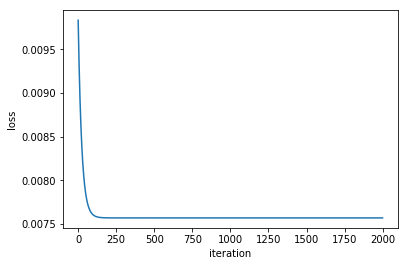

In [15]:
plt.figure()
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show

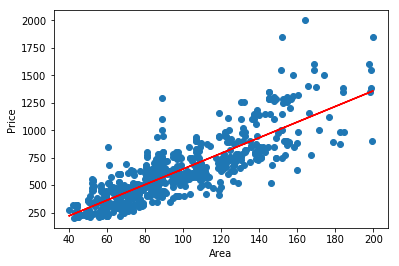

In [16]:
plt.figure()
z=net.forward(x_)
x__=x*(maximums[0]-minimums[0])+avgs[0]
y_=y*(maximums[1]-minimums[1])+avgs[1]
z_=z*(maximums[1]-minimums[1])+avgs[1]
plt.scatter(x__,y_)
plt.plot(x__,z_,c='r')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# **房价预测的Paddle框架实现**
原理部分与上相同，故不赘述，但此次采用的是双层的神经网络模型，隐层数量为5。以下图片仅供参考  
![](https://ai-studio-static-online.cdn.bcebos.com/f2bc45a521b84399a89d52b4c0df05d8db1f6ef737bb47a7bb9a871b2a57557c)


In [17]:
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import numpy as np
import os
import random

In [18]:
class Network(paddle.nn.Layer):

    # self代表类的实例自身
    def __init__(self,num):
        # 初始化父类中的一些参数
        super(Network, self).__init__()
        
        # 定义一层全连接层，输入维度是num，输出维度是1
        self.fc1 = Linear(in_features=num, out_features=5)
        self.a=paddle.nn.Sigmoid()
        self.fc2 = Linear(5,out_features=1)
    
    # 网络的前向计算
    def forward(self, inputs):
        x = self.fc1(inputs)
        x=self.a(x)
        x=self.fc2(x)
        return x

In [19]:
#对上述函数进行封装
def data_load_new(data_path,ratio=0.8):
    data=np.loadtxt(data_path,delimiter = ',',dtype='float32')
    maximums, minimums, avgs = data.max(axis=0), data.min(axis=0), data.sum(axis=0)/data.shape[0]
    #归一化
    data=(data-avgs)/(maximums-minimums)
    #数据集分割
    ratio = 0.8
    offset = int(data.shape[0]*ratio)
    train_data = data[:offset].copy()
    test_data = data[offset:].copy()
    return train_data,test_data

In [20]:
# 声明定义好的线性回归模型
model = Network(x.shape[1])
# 开启模型训练模式
model.train()
# 加载数据
training_data, test_data = data_load_new(data_path)
# 定义优化算法，使用随机梯度下降SGD
# 学习率设置为0.01
opt = paddle.optimizer.SGD(learning_rate=0.01, parameters=model.parameters())
print(train_data.shape,test_data.shape)

(696, 2) (174, 2)


In [21]:
EPOCH_NUM = 10   # 设置外层循环次数
BATCH_SIZE = 10  # 设置batch大小

# 定义外层循环
for epoch_id in range(EPOCH_NUM):
    # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
    np.random.shuffle(training_data)
    # 将训练数据进行拆分，每个batch包含16条数据
    mini_batches = [training_data[k:k+BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]
    # 定义内层循环
    for iter_id, mini_batch in enumerate(mini_batches):
        x = np.array(mini_batch[:, :-1]) # 获得当前批次训练数据
        y = np.array(mini_batch[:, -1]) # 获得当前批次训练标签（真实房价）
        # 将numpy数据转为飞桨动态图tensor形式
        features = paddle.to_tensor(x)
        prices = paddle.to_tensor(y)
        
        # print(features)

        # 前向计算
        predicts = model(features)
        
        # 计算损失
        loss = F.square_error_cost(predicts, label=prices)
        avg_loss = paddle.mean(loss)
        if iter_id%20==0:
            print("epoch: {}, iter: {}, loss is: {}".format(epoch_id, iter_id, avg_loss.numpy()))
        # print("epoch: {}, iter: {}, loss is: {}".format(epoch_id, iter_id, avg_loss.numpy()))
        
        # 反向传播
        avg_loss.backward()
        # 最小化loss,更新参数
        opt.step()
        # 清除梯度
        opt.clear_grad()

epoch: 0, iter: 0, loss is: [0.05017536]
epoch: 0, iter: 20, loss is: [0.06578198]
epoch: 0, iter: 40, loss is: [0.01627292]
epoch: 0, iter: 60, loss is: [0.0270567]
epoch: 1, iter: 0, loss is: [0.02686214]
epoch: 1, iter: 20, loss is: [0.03278282]
epoch: 1, iter: 40, loss is: [0.01043378]
epoch: 1, iter: 60, loss is: [0.01825193]
epoch: 2, iter: 0, loss is: [0.02946778]
epoch: 2, iter: 20, loss is: [0.0331132]
epoch: 2, iter: 40, loss is: [0.05390023]
epoch: 2, iter: 60, loss is: [0.0153296]
epoch: 3, iter: 0, loss is: [0.00988064]
epoch: 3, iter: 20, loss is: [0.02652352]
epoch: 3, iter: 40, loss is: [0.04143903]
epoch: 3, iter: 60, loss is: [0.01007791]
epoch: 4, iter: 0, loss is: [0.01338017]
epoch: 4, iter: 20, loss is: [0.02541921]
epoch: 4, iter: 40, loss is: [0.02249742]
epoch: 4, iter: 60, loss is: [0.01400937]
epoch: 5, iter: 0, loss is: [0.03175814]
epoch: 5, iter: 20, loss is: [0.02026823]
epoch: 5, iter: 40, loss is: [0.01563983]
epoch: 5, iter: 60, loss is: [0.0965492]
ep

# 两种方法的比较
复原方法均为x=x*（maximums-minmums）+avgs
使用测试集计算两种方法的均方误差，比较两者的误差大小

In [22]:
_,_,test_feature,test_label=data_load(data_path)
test_feature_1=modify_x(test_feature)
way1_out=net.forward(test_feature_1)

#转换为预测模式，更加节省内存速度更快性能更高
model.eval()
test_feature_2=paddle.to_tensor(test_feature)
way2_out=model(test_feature_2)


# way1_out=way1_out*(maximums[1]-minimums[1])+avgs[1]
# way2_out=way2_out*(maximums[1]-minimums[1])+avgs[1]
# test_label=test_label*(maximums[1]-minimums[1])+avgs[1]
test_label_2=paddle.to_tensor(test_label)
loss1=net.loss(way1_out,test_label)
loss2=F.square_error_cost(way2_out,label=test_label_2)
loss2=np.mean(loss2.numpy())

print(f'loss    way1:{loss1}  way2:{loss2}')

loss    way1:0.04192041453699585  way2:0.027418352663517


经过比较发现，第二种的方法的误差更小，但是我们对比可以发现第一种方法在训练机上的误差是更小的，所以我们可以断言第一种方法由于每一次使用所有的训练集进行训练所有模型在训练集上产生了过拟合的现象，而第二种方法采用随机梯度下降的方法，无疑更加具有鲁棒性，同时在编辑神经网络架构时更加方便快捷。

In [23]:
way1_out=way1_out*(maximums[1]-minimums[1])+avgs[1]
way2_out=way2_out*(maximums[1]-minimums[1])+avgs[1]
test_label=test_label*(maximums[1]-minimums[1])+avgs[1]
test_label_2=paddle.to_tensor(test_label)
loss1=net.loss(way1_out,test_label)
loss2=F.square_error_cost(way2_out,label=test_label_2)
loss2=np.mean(loss2.numpy())

print(f'loss    way1:{loss1}  way2:{loss2}')

loss    way1:135520.48384232534  way2:88638.15625
